#  NBA - Classificação de Posições de Jogadores

## Objetivo
Este notebook consolida todo o pipeline de análise para classificação de posições de jogadores da NBA, incluindo:
- Tratamento e limpeza de dados
- Engenharia de features
- Modelagem e avaliação de classificadores

## Dataset
- **Fonte**: nba_stats.csv
- **Target**: Posição do jogador (PG, SG, SF, PF, C)
- **Features**: Métricas de desempenho dos jogadores

##  Importações e Configurações

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

---
# 1: Carregamento e Análise Inicial

Nesta seção, carregamos o dataset e realizamos uma análise exploratória inicial.

In [4]:
# Carregar dataset
#df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Int_Ciencia_Dados/nba_stats.csv')
df = pd.read_csv('nba_stats.csv')
print(f"Shape do dataset: {df.shape}")
print(f"\nColunas ({len(df.columns)}): {df.columns.tolist()}")
df.head()

Shape do dataset: (8162, 54)

Colunas (54): ['year', 'name', 'playerId', 'playerSlug', 'positionId', 'teamId', 'status', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls', 'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble', 'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints', 'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct', 'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted', 'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted', 'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points', 'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade', 'threePointFieldGoalsAttempted', 'freeThrowsMade', 'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks', 'steals', 'blocks', 'position', 'birthdate', 'college', 'draftinfo', 'birthplace', 'team', 'htwt', 'experience', 'rankingSalary', 'salary']


,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


### Análise de Qualidade dos Dados

In [5]:
# Informações gerais
print("=== INFORMAÇÕES GERAIS ===")
df.info()

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
display(df.describe())

# Valores ausentes
print("\n=== VALORES AUSENTES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Ausentes': missing.values,
    'Percentual (%)': missing_pct.values
})
display(missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False))

print(f"\nRegistros duplicados: {df.duplicated().sum()}")

=== INFORMAÇÕES GERAIS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non

,year,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,rankingSalary
count,8162.000000,8.162000e+03,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
mean,2012.214776,8.666390e+05,57.978804,22.519525,1.962077,0.297599,2.159642,0.145430,5.431144,0.172507,1427.222985,254.603774,121.683778,4.022146,9.520022,3.541030,7.794584,45.016741,0.733632,2.062167,26.508512,1.704331,2.245933,72.610135,2.077955,1.296104,611.716614,227.427836,497.336560,46.650576,129.835212,110.210365,144.387405,133.548395,81.996815,0.706763,0.463943,44.879441,29.252022,210.610512
std,6.701035,1.517331e+06,21.756214,9.478818,0.750375,0.653207,3.217839,0.446963,10.202230,1.263530,852.746857,198.263379,68.497349,2.525045,6.172618,2.227449,4.740203,7.919343,0.771699,2.019911,16.467585,1.490691,1.844255,15.836810,1.916022,0.816477,478.048933,173.776186,372.424022,54.275904,142.367073,109.945917,137.447434,139.569406,63.099111,0.437720,0.486103,34.028145,34.792868,140.763132
min,1999.000000,2.000000e+00,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2007.000000,9.290000e+02,46.000000,15.097222,1.446808,0.000000,0.000000,0.000000,0.000000,0.000000,713.000000,108.000000,69.000000,2.181818,4.759444,1.820357,4.083334,41.111000,0.022998,0.145161,16.666667,0.661972,0.933333,67.246248,0.737802,0.690976,226.000000,86.000000,193.250000,1.000000,6.000000,31.000000,44.250000,35.000000,33.000000,0.383562,0.147059,18.000000,7.000000,90.000000
50%,2013.000000,3.045500e+03,64.000000,22.769346,1.972222,0.000000,1.000000,0.000000,1.000000,0.000000,1441.500000,217.000000,123.000000,3.458333,8.231238,3.109673,6.836022,44.517500,0.524590,1.629630,32.446808,1.256757,1.712329,75.800003,1.444444,1.111111,521.000000,196.000000,431.000000,26.000000,82.000000,77.000000,104.000000,88.000000,69.000000,0.634146,0.307692,39.000000,18.000000,192.000000
75%,2018.000000,2.451037e+06,76.000000,30.448024,2.486486,0.000000,3.000000,0.000000,6.000000,0.000000,2096.750000,350.000000,172.000000,5.229730,13.000000,4.870963,10.698391,48.616499,1.206643,3.375000,37.254903,2.271368,3.000000,82.158003,2.792683,1.731707,885.750000,332.000000,725.000000,78.000000,218.000000,154.000000,203.000000,185.000000,118.000000,0.946429,0.597170,64.000000,38.000000,321.000000
max,2023.000000,4.997528e+06,85.000000,43.700000,6.000000,9.000000,41.000000,7.000000,69.000000,42.000000,3485.000000,1247.000000,371.000000,16.333334,36.128204,12.225000,27.816668,100.000000,5.349206,13.179487,100.000000,10.176471,12.253968,100.000000,11.738461,5.728395,2832.000000,978.000000,2173.000000,402.000000,1028.000000,756.000000,916.000000,925.000000,464.000000,2.885246,3.913044,225.000000,307.000000,676.000000



=== VALORES AUSENTES ===


,Coluna,Valores Ausentes,Percentual (%)
51,experience,5858,71.771625
50,htwt,5858,71.771625
49,team,5858,71.771625
46,college,1412,17.299681
47,draftinfo,1185,14.518500
48,birthplace,215,2.634158
4,positionId,6,0.073511



Registros duplicados: 0


---
# 2: Tratamento e Limpeza de Dados

## 2.1 Tratamento de Valores Ausentes e remoção de registros inuteis

**Estratégia**:
- Colunas numéricas: preencher com 0
- Colunas categóricas: preencher com 'Unknown'

In [6]:
# Preencher valores ausentes
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(0, inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

print(f"✅ Valores ausentes restantes: {df.isnull().sum().sum()}")

✅ Valores ausentes restantes: 0


In [7]:
# Atualizar o df sem o registro Guard-Foward
df = df.loc[df['position'] != 'Guard-Forward'].copy()

In [8]:
# Verificar registros com posição "Not Available" (só tem o Eddy Curry...)
print("Registros com posição 'Not Available':")
not_available = df[df['position'] == 'Not Available']
print(f"Total: {len(not_available)} registros")
if len(not_available) > 0:
    print("Jogadores únicos:")
    print(not_available['name'].value_counts())

# Remover todas as linhas com posição "Not Available"
print(f"\nShape antes da remoção: {df.shape}")
df = df[df['position'] != 'Not Available'].copy()
print(f"Shape após remoção: {df.shape}")
print(f"Registros removidos: {len(not_available)}")

Registros com posição 'Not Available':
Total: 6 registros
Jogadores únicos:
name
Eddy Curry    6
Name: count, dtype: int64

Shape antes da remoção: (8161, 54)
Shape após remoção: (8155, 54)
Registros removidos: 6


## 2.2 Tratamento da Coluna 'experience'

A coluna `experience` contém valores como 'Rookie', '1st', '2nd', etc. Vamos converter para numérico.

In [9]:
def convert_experience(exp):
    """
    Converte valores de experience para numérico.

    Args:
        exp: Valor da experiência (string ou número)

    Returns:
        int: Anos de experiência (0 para rookies)
    """
    if pd.isna(exp):
        return 0

    exp_str = str(exp).strip().lower()

    if exp_str == 'rookie' or exp_str == 'r':
        return 0

    # Extrair números de strings como '1st', '2nd', '10th'
    match = re.search(r'\d+', exp_str)
    if match:
        return int(match.group())

    try:
        return int(float(exp_str))
    except:
        return 0

# Aplicar conversão
if 'experience' in df.columns:
    df['experience_num'] = df['experience'].apply(convert_experience)
    print(" Coluna 'experience_num' criada")
    print(f"\nRange: {df['experience_num'].min()} - {df['experience_num'].max()} anos")
    print(df['experience_num'].describe())

 Coluna 'experience_num' criada

Range: 0 - 19 anos
count    8155.000000
mean        2.215819
std         4.297357
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        19.000000
Name: experience_num, dtype: float64


### Visualização da Distribuição de Experiência

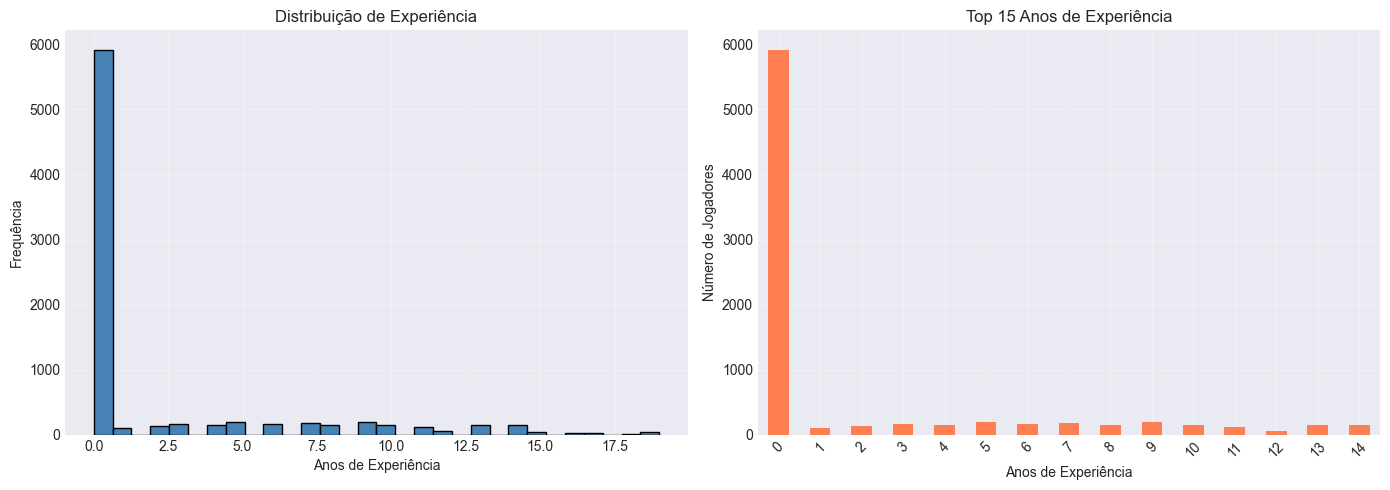

In [10]:
if 'experience_num' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    axes[0].hist(df['experience_num'], bins=30, edgecolor='black', color='steelblue')
    axes[0].set_xlabel('Anos de Experiência')
    axes[0].set_ylabel('Frequência')
    axes[0].set_title('Distribuição de Experiência')
    axes[0].grid(True, alpha=0.3)

    # Top 15
    df['experience_num'].value_counts().head(15).sort_index().plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_xlabel('Anos de Experiência')
    axes[1].set_ylabel('Número de Jogadores')
    axes[1].set_title('Top 15 Anos de Experiência')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## 2.3 Verificação da Variável Target

Análise da distribuição de posições e balanceamento de classes.

In [11]:
if 'position' in df.columns:
    print(f"Posições únicas: {df['position'].nunique()}")
    print(f"\nDistribuição:")
    display(df['position'].value_counts().sort_index())

    # Remover registros sem posição
    if df['position'].isnull().sum() > 0:
        print(f"\nRemovendo {df['position'].isnull().sum()} registros sem posição")
        df = df.dropna(subset=['position'])

    # Verificar balanceamento
    min_samples = df['position'].value_counts().min()
    max_samples = df['position'].value_counts().max()
    imbalance_ratio = max_samples / min_samples

    print(f"\nMínimo de amostras por classe: {min_samples}")
    print(f"Máximo de amostras por classe: {max_samples}")
    print(f"Razão de desbalanceamento: {imbalance_ratio:.2f}x")

    if imbalance_ratio > 2:
        print("⚠ Classes desbalanceadas - usar class_weight='balanced'")
    else:
        print(" Classes relativamente balanceadas")

Posições únicas: 7

Distribuição:


position
Center            1530
Forward            751
Guard              786
Point Guard       1214
Power Forward     1422
Shooting Guard    1261
Small Forward     1191
Name: count, dtype: int64


Mínimo de amostras por classe: 751
Máximo de amostras por classe: 1530
Razão de desbalanceamento: 2.04x
⚠ Classes desbalanceadas - usar class_weight='balanced'


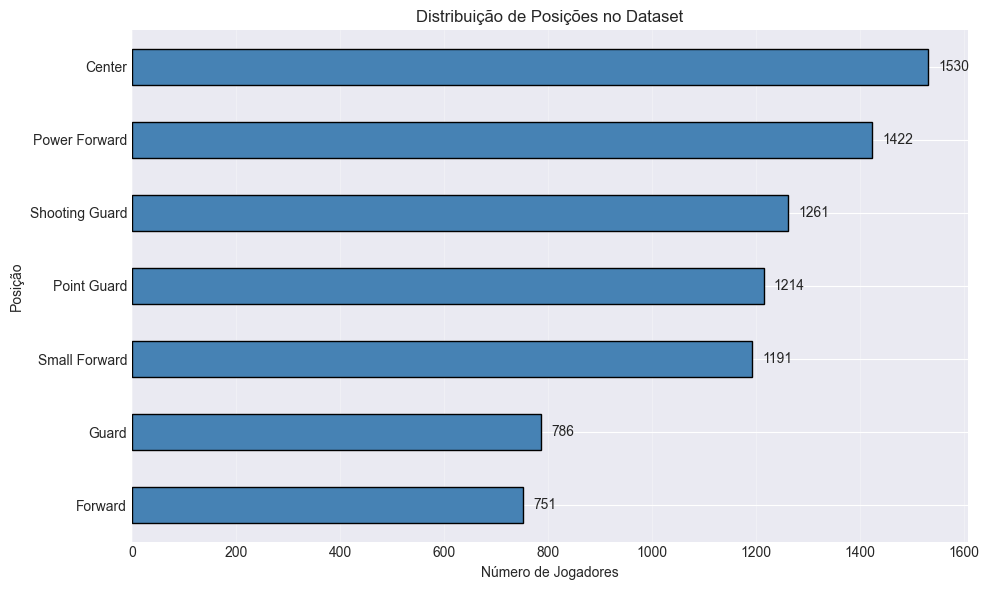

In [12]:
# Visualizar distribuição de posições
if 'position' in df.columns:
    plt.figure(figsize=(10, 6))
    position_counts = df['position'].value_counts().sort_values(ascending=True)
    position_counts.plot(kind='barh', color='steelblue', edgecolor='black')
    plt.xlabel('Número de Jogadores')
    plt.ylabel('Posição')
    plt.title('Distribuição de Posições no Dataset')
    plt.grid(True, alpha=0.3, axis='x')

    for i, v in enumerate(position_counts.values):
        plt.text(v + 20, i, str(v), va='center')

    plt.tight_layout()
    plt.show()

## 2.4 Análise de Outliers

Utilizamos o método IQR (Interquartile Range) para detectar outliers.

In [13]:
def detect_outliers_iqr(df, columns):
    """
    Detecta outliers usando método IQR.

    Args:
        df: DataFrame
        columns: Lista de colunas para análise

    Returns:
        dict: Informações sobre outliers por coluna
    """
    outliers_dict = {}

    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_dict[col] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(df)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }

    return outliers_dict

# Colunas para análise
numeric_features = [
    'avgPoints', 'avgRebounds', 'avgAssists', 'avgBlocks', 'avgSteals',
    'avgMinutes', 'fieldGoalPct', 'threePointFieldGoalPct', 'freeThrowPct',
    'avgTurnovers'
]

if 'experience_num' in df.columns:
    numeric_features.append('experience_num')

outliers_info = detect_outliers_iqr(df, numeric_features)

print("=== OUTLIERS DETECTADOS ===\n")
for col, info in outliers_info.items():
    if info['count'] > 0:
        print(f"{col}:")
        print(f"  Outliers: {info['count']} ({info['percentage']:.2f}%)")
        print(f"  Limites: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]\n")

print("\n⚠ DECISÃO: Manter outliers (podem ser características de posições específicas)")

=== OUTLIERS DETECTADOS ===

avgPoints:
  Outliers: 166 (2.04%)
  Limites: [-7.60, 25.36]

avgRebounds:
  Outliers: 300 (3.68%)
  Limites: [-2.39, 9.80]

avgAssists:
  Outliers: 466 (5.71%)
  Limites: [-2.34, 5.87]

avgBlocks:
  Outliers: 580 (7.11%)
  Limites: [-0.53, 1.27]

avgSteals:
  Outliers: 187 (2.29%)
  Limites: [-0.46, 1.79]

fieldGoalPct:
  Outliers: 469 (5.75%)
  Limites: [29.89, 59.81]

threePointFieldGoalPct:
  Outliers: 47 (0.58%)
  Limites: [-14.22, 68.15]

freeThrowPct:
  Outliers: 355 (4.35%)
  Limites: [44.94, 104.50]

avgTurnovers:
  Outliers: 205 (2.51%)
  Limites: [-0.87, 3.29]

experience_num:
  Outliers: 1485 (18.21%)
  Limites: [-3.00, 5.00]


⚠ DECISÃO: Manter outliers (podem ser características de posições específicas)


## 2.5 Dataset Limpo

Seleção de features relevantes e criação do dataset limpo.

In [14]:
# Selecionar colunas relevantes
features_to_keep = [
    'name', 'position', 'team', 'year',
    'avgPoints', 'avgRebounds', 'avgAssists', 'avgBlocks', 'avgSteals',
    'avgMinutes', 'avgTurnovers',
    'fieldGoalPct', 'threePointFieldGoalPct', 'freeThrowPct',
    'avgFieldGoalsMade', 'avgFieldGoalsAttempted',
    'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
    'avgFreeThrowsMade', 'avgFreeThrowsAttempted'
]

if 'experience_num' in df.columns:
    features_to_keep.append('experience_num')

# Verificar colunas existentes
missing_cols = [col for col in features_to_keep if col not in df.columns]
if missing_cols:
    print(f"⚠ Colunas ausentes: {missing_cols}")
    features_to_keep = [col for col in features_to_keep if col in df.columns]

df_clean = df[features_to_keep].copy()

print("=== DATASET LIMPO ===")
print(f"Shape: {df_clean.shape}")
print(f"Valores ausentes: {df_clean.isnull().sum().sum()}")
print(f"Duplicatas: {df_clean.duplicated().sum()}")
print(f"\nPosições: {df_clean['position'].nunique()}")
display(df_clean['position'].value_counts())
display(df_clean.head(10))

=== DATASET LIMPO ===
Shape: (8155, 21)
Valores ausentes: 0
Duplicatas: 0

Posições: 7


position
Center            1530
Power Forward     1422
Shooting Guard    1261
Point Guard       1214
Small Forward     1191
Guard              786
Forward            751
Name: count, dtype: int64

,name,position,team,year,avgPoints,avgRebounds,avgAssists,avgBlocks,avgSteals,avgMinutes,avgTurnovers,fieldGoalPct,threePointFieldGoalPct,freeThrowPct,avgFieldGoalsMade,avgFieldGoalsAttempted,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,avgFreeThrowsMade,avgFreeThrowsAttempted,experience_num
0,Allen Iverson,Shooting Guard,Unknown,1999,26.750000,4.916666,4.645834,0.145833,2.291667,41.458332,3.479167,41.193001,29.145730,75.105003,9.062500,22.000000,1.208333,4.145834,7.416666,9.875000,0
1,Allen Iverson,Shooting Guard,Unknown,2000,28.414286,3.814286,4.685714,0.071429,2.057143,40.757140,3.285714,42.066002,34.099618,71.290001,10.414286,24.757143,1.271429,3.728571,6.314286,8.857142,0
2,Allen Iverson,Shooting Guard,Unknown,2001,31.084507,3.845070,4.577465,0.281690,2.507042,41.957745,3.338028,42.029999,32.026145,81.362999,10.732394,25.535212,1.380282,4.309859,8.239436,10.126760,0
3,Allen Iverson,Shooting Guard,Unknown,2002,31.383333,4.483333,5.516667,0.216667,2.800000,43.700000,3.950000,39.844002,29.104477,81.196999,11.083333,27.816668,1.300000,4.466667,7.916666,9.750000,0
4,Allen Iverson,Shooting Guard,Unknown,2003,27.585365,4.195122,5.536585,0.158537,2.743902,42.500000,3.487805,41.443001,27.722773,77.445999,9.804878,23.658537,1.024390,3.695122,6.951220,8.975610,0
5,Allen Iverson,Shooting Guard,Unknown,2004,26.375000,3.708333,6.750000,0.104167,2.395833,42.500000,4.354166,38.667000,28.643215,74.504997,9.062500,23.437500,1.187500,4.145834,7.062500,9.479167,0
6,Allen Iverson,Shooting Guard,Unknown,2005,30.693333,3.986667,7.946667,0.120000,2.400000,42.320000,4.586667,42.409000,30.769232,83.460999,10.280000,24.240000,1.386667,4.506667,8.746667,10.480000,0
7,Allen Iverson,Shooting Guard,Unknown,2006,33.013890,3.222222,7.388889,0.138889,1.944444,43.097220,3.444444,44.730999,32.286996,81.422997,11.319445,25.305555,1.000000,3.097222,9.375000,11.513889,0
8,Allen Iverson,Shooting Guard,Unknown,2007,26.292307,2.969231,7.200000,0.200000,1.892308,42.476925,4.123077,44.250000,31.472081,79.508003,8.938461,20.200000,0.953846,3.030769,7.461538,9.384615,0
9,Allen Iverson,Shooting Guard,Unknown,2008,26.390244,2.963415,7.146341,0.146341,1.951220,41.756096,2.987805,45.757999,34.545454,80.928001,8.682927,18.975609,1.158537,3.353658,7.865854,9.719512,0


---
# 3: Engenharia de Features

Criação de 15 features derivadas para caracterizar cada posição.

## 3.1 Features para Armadores (PG)

In [15]:
# 1. Razão Assistência/Turnover
df_clean['assist_turnover_ratio'] = df_clean['avgAssists'] / (df_clean['avgTurnovers'] + 1)

# 2. Assistências por Minuto
df_clean['assists_per_minute'] = df_clean['avgAssists'] / (df_clean['avgMinutes'] + 1)

# 3. Playmaking Score
df_clean['playmaking_score'] = df_clean['avgAssists'] * 2 - df_clean['avgTurnovers']

print("✅ Features para Armadores (PG) criadas:")
print("  - assist_turnover_ratio: Habilidade de criar jogadas sem erros")
print("  - assists_per_minute: Eficiência em criar jogadas")
print("  - playmaking_score: Score geral de criação de jogadas")

✅ Features para Armadores (PG) criadas:
  - assist_turnover_ratio: Habilidade de criar jogadas sem erros
  - assists_per_minute: Eficiência em criar jogadas
  - playmaking_score: Score geral de criação de jogadas


## 3.2 Features para Jogadores Internos (C, PF)

In [16]:
# 4. Rebotes por Minuto
df_clean['rebounds_per_minute'] = df_clean['avgRebounds'] / (df_clean['avgMinutes'] + 1)

# 5. Bloqueios por Minuto
df_clean['blocks_per_minute'] = df_clean['avgBlocks'] / (df_clean['avgMinutes'] + 1)

# 6. Interior Dominance
df_clean['interior_dominance'] = df_clean['avgRebounds'] + df_clean['avgBlocks'] * 2

print(" Features para Jogadores Internos (C, PF) criadas:")
print("  - rebounds_per_minute: Eficiência em rebotes")
print("  - blocks_per_minute: Eficiência defensiva no garrafão")
print("  - interior_dominance: Dominância no garrafão")

 Features para Jogadores Internos (C, PF) criadas:
  - rebounds_per_minute: Eficiência em rebotes
  - blocks_per_minute: Eficiência defensiva no garrafão
  - interior_dominance: Dominância no garrafão


## 3.3 Features para Arremessadores (SG, SF)

In [17]:
# 7. Taxa de Arremessos de 3 Pontos
df_clean['three_point_rate'] = df_clean['avgThreePointFieldGoalsMade'] / (df_clean['avgFieldGoalsMade'] + 1)

# 8. Eficiência de Pontuação
df_clean['scoring_efficiency'] = df_clean['avgPoints'] / (df_clean['avgFieldGoalsAttempted'] + 1)

# 9. Ameaça no Perímetro
df_clean['perimeter_threat'] = df_clean['avgThreePointFieldGoalsMade'] * df_clean['threePointFieldGoalPct']

print(" Features para Arremessadores (SG, SF) criadas:")
print("  - three_point_rate: Proporção de arremessos de 3 pontos")
print("  - scoring_efficiency: Pontos por tentativa")
print("  - perimeter_threat: Ameaça de longa distância")

 Features para Arremessadores (SG, SF) criadas:
  - three_point_rate: Proporção de arremessos de 3 pontos
  - scoring_efficiency: Pontos por tentativa
  - perimeter_threat: Ameaça de longa distância


## 3.4 Features Defensivas

In [18]:
# 10. Versatilidade Defensiva
df_clean['defensive_versatility'] = df_clean['avgSteals'] / (df_clean['avgBlocks'] + 1)

# 11. Impacto Defensivo Total
df_clean['defensive_impact'] = df_clean['avgSteals'] + df_clean['avgBlocks']

# 12. Roubos por Minuto
df_clean['steals_per_minute'] = df_clean['avgSteals'] / (df_clean['avgMinutes'] + 1)

print(" Features Defensivas criadas:")
print("  - defensive_versatility: Razão roubos/bloqueios")
print("  - defensive_impact: Impacto defensivo total")
print("  - steals_per_minute: Eficiência em roubos")

 Features Defensivas criadas:
  - defensive_versatility: Razão roubos/bloqueios
  - defensive_impact: Impacto defensivo total
  - steals_per_minute: Eficiência em roubos


## 3.5 Features de Eficiência Geral

In [19]:
# 13. Pontos por Minuto
df_clean['points_per_minute'] = df_clean['avgPoints'] / (df_clean['avgMinutes'] + 1)

# 14. Usage Rate
df_clean['usage_rate'] = (df_clean['avgFieldGoalsAttempted'] +
                          df_clean['avgFreeThrowsAttempted'] * 0.44 +
                          df_clean['avgTurnovers'])

# 15. True Shooting Percentage
df_clean['true_shooting_pct'] = (df_clean['avgPoints'] /
                                 (2 * (df_clean['avgFieldGoalsAttempted'] +
                                       0.44 * df_clean['avgFreeThrowsAttempted'] + 0.001)))

print(" Features de Eficiência Geral criadas:")
print("  - points_per_minute: Eficiência ofensiva")
print("  - usage_rate: Taxa de uso do jogador")
print("  - true_shooting_pct: Percentual real de arremesso")

# Tratar infinitos e NaN
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.fillna(0, inplace=True)

print(f"\n Total de features criadas: 15")
print(f"Dataset final: {df_clean.shape}")

 Features de Eficiência Geral criadas:
  - points_per_minute: Eficiência ofensiva
  - usage_rate: Taxa de uso do jogador
  - true_shooting_pct: Percentual real de arremesso

 Total de features criadas: 15
Dataset final: (8155, 36)


### Resumo das Features Criadas

| Categoria | Features | Descrição |
|-----------|----------|-----------|
| **Armadores (PG)** | 3 | Assistências, criação de jogadas |
| **Jogadores Internos (C, PF)** | 3 | Rebotes, bloqueios, domínio interno |
| **Arremessadores (SG, SF)** | 3 | Arremessos de 3 pontos, eficiência |
| **Defensivas** | 3 | Roubos, bloqueios, versatilidade |
| **Eficiência Geral** | 3 | Pontuação, uso, true shooting |
| **TOTAL** | **15** | Features derivadas |

### Visualização: Features por Posição

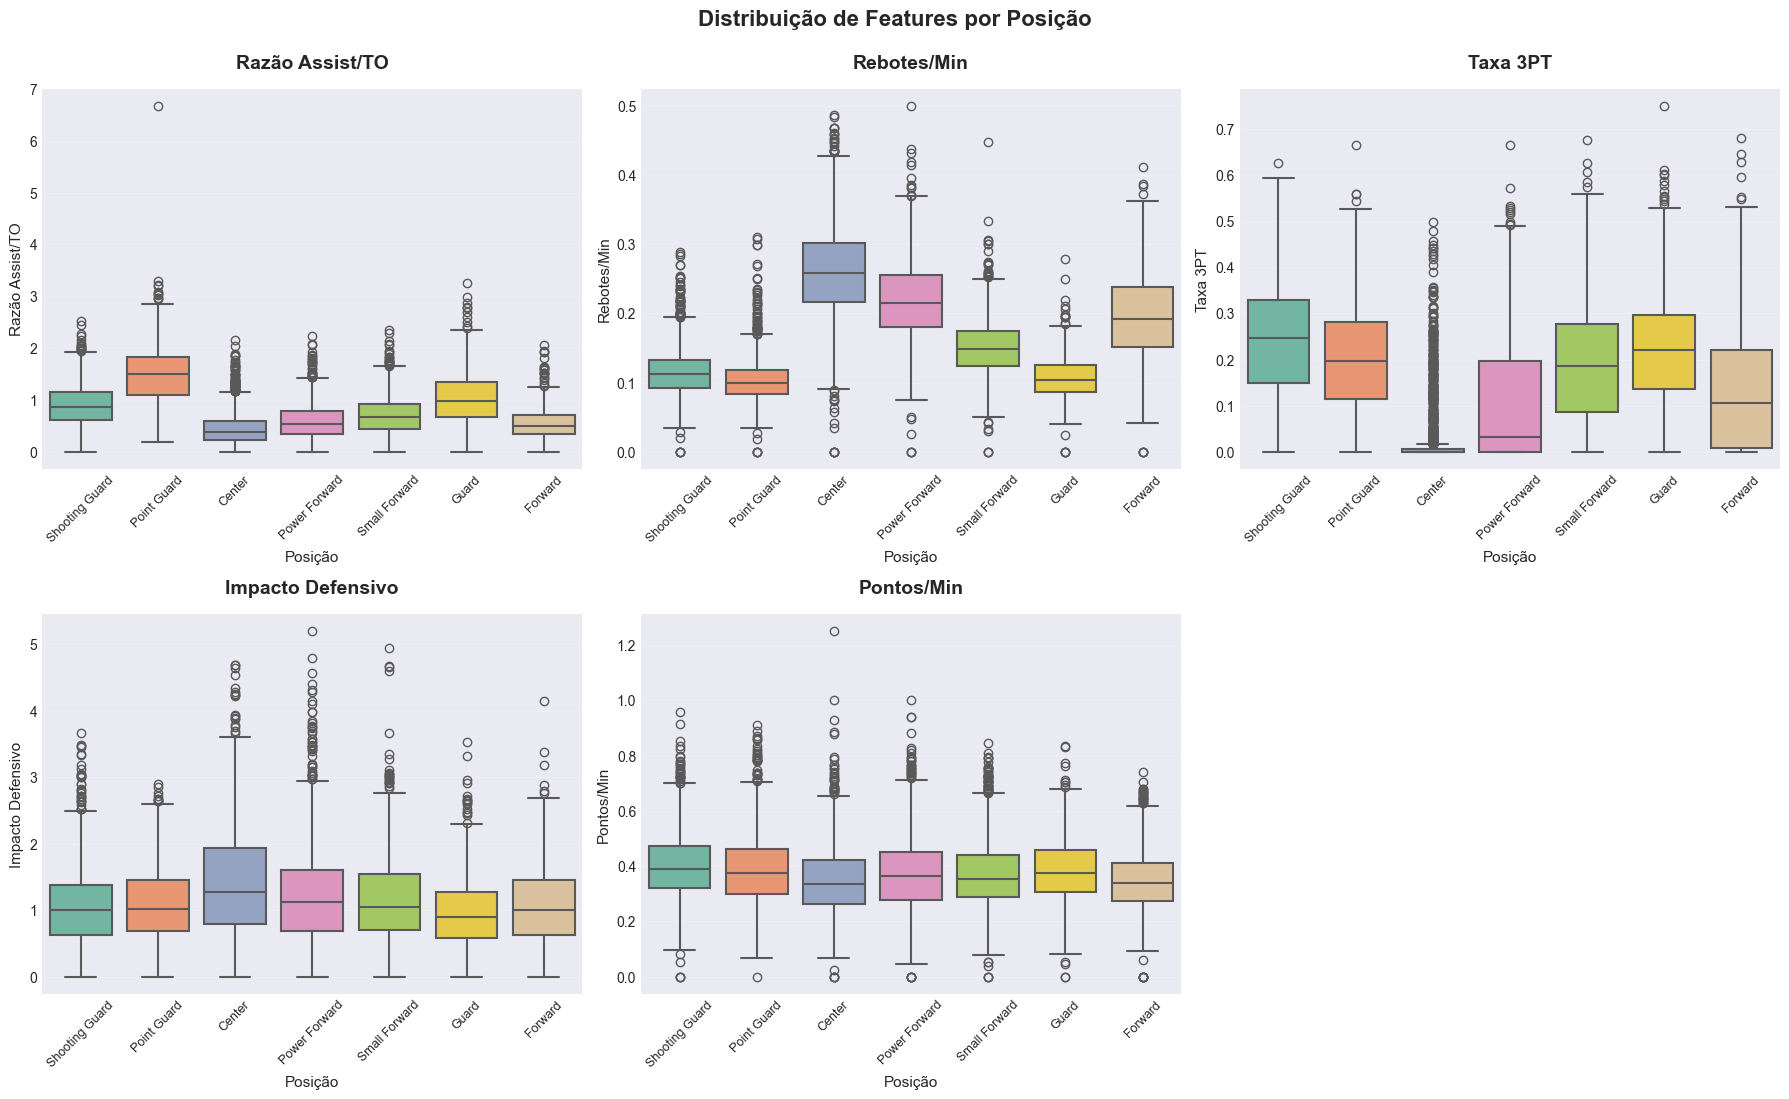

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features chave para visualização com nomes mais limpos
key_features = [
    ('assist_turnover_ratio', 'Razão Assist/TO'),
    ('rebounds_per_minute', 'Rebotes/Min'),
    ('three_point_rate', 'Taxa 3PT'),
    ('defensive_impact', 'Impacto Defensivo'),
    ('points_per_minute', 'Pontos/Min')
]

# Criar figura
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.ravel()

# Paleta de cores para as posições
colors = sns.color_palette("Set2", n_colors=7)

for idx, (feature, label) in enumerate(key_features):
    if idx < len(axes):
        # Boxplot com cores por posição
        sns.boxplot(
            data=df_clean,
            x='position',
            y=feature,
            ax=axes[idx],
            palette=colors,
            linewidth=1.5
        )

        # Customização
        axes[idx].set_title(label, fontsize=14, fontweight='bold', pad=15)
        axes[idx].set_xlabel('Posição', fontsize=11)
        axes[idx].set_ylabel(label, fontsize=11)
        axes[idx].tick_params(axis='x', rotation=45, labelsize=9)
        axes[idx].grid(True, alpha=0.2, axis='y')

        # Remover spines superiores e direitos para visual limpo
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['right'].set_visible(False)

# Remover subplot extra
if len(key_features) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('Distribuição de Features por Posição',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### Correlação entre Features e Posições

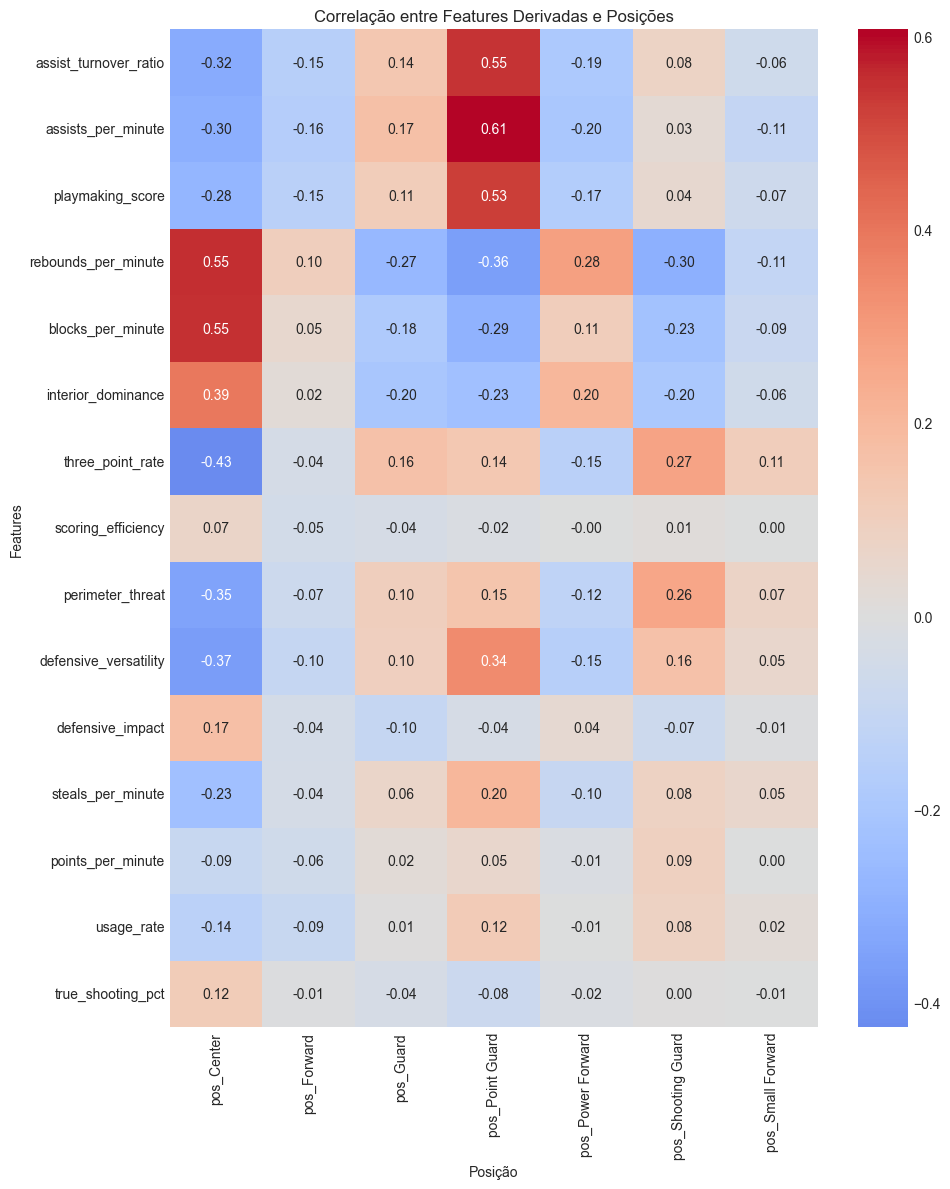


Top 5 correlações por posição:

pos_Center:
  rebounds_per_minute: 0.555
  blocks_per_minute: 0.549
  three_point_rate: 0.425
  interior_dominance: 0.394
  defensive_versatility: 0.366

pos_Forward:
  assists_per_minute: 0.162
  assist_turnover_ratio: 0.152
  playmaking_score: 0.145
  rebounds_per_minute: 0.103
  defensive_versatility: 0.100

pos_Guard:
  rebounds_per_minute: 0.267
  interior_dominance: 0.204
  blocks_per_minute: 0.181
  assists_per_minute: 0.170
  three_point_rate: 0.161

pos_Point Guard:
  assists_per_minute: 0.607
  assist_turnover_ratio: 0.546
  playmaking_score: 0.529
  rebounds_per_minute: 0.361
  defensive_versatility: 0.344

pos_Power Forward:
  rebounds_per_minute: 0.282
  interior_dominance: 0.205
  assists_per_minute: 0.202
  assist_turnover_ratio: 0.191
  playmaking_score: 0.167

pos_Shooting Guard:
  rebounds_per_minute: 0.299
  three_point_rate: 0.271
  perimeter_threat: 0.261
  blocks_per_minute: 0.227
  interior_dominance: 0.198

pos_Small Forward:
  t

In [21]:
new_features = [
    'assist_turnover_ratio', 'assists_per_minute', 'playmaking_score',
    'rebounds_per_minute', 'blocks_per_minute', 'interior_dominance',
    'three_point_rate', 'scoring_efficiency', 'perimeter_threat',
    'defensive_versatility', 'defensive_impact', 'steals_per_minute',
    'points_per_minute', 'usage_rate', 'true_shooting_pct'
]

# Criar variáveis dummy para posições
position_dummies = pd.get_dummies(df_clean['position'], prefix='pos')
df_corr = pd.concat([df_clean[new_features], position_dummies], axis=1)

correlation_matrix = df_corr.corr()
position_cols = [col for col in correlation_matrix.columns if col.startswith('pos_')]
feature_position_corr = correlation_matrix.loc[new_features, position_cols]

# Heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(feature_position_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlação entre Features Derivadas e Posições')
plt.xlabel('Posição')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 5 correlações por posição:")
for pos in position_cols:
    print(f"\n{pos}:")
    top_features = feature_position_corr[pos].abs().sort_values(ascending=False).head(5)
    for feat, corr in top_features.items():
        print(f"  {feat}: {corr:.3f}")

---
# 4: Modelagem e Avaliação


## 4.1 Preparação dos Dados

> [!IMPORTANT]
> **Filtragem de Classes**: Algumas posições no dataset podem ter muito poucas amostras. Para usar `stratify` no train_test_split (que garante proporções iguais de classes em treino e teste), precisamos de pelo menos 2 amostras por classe. Classes com apenas 1 amostra serão removidas.

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC   # ou outro modelo

# -------------------------------------------------
# Filtrar classes com poucas amostras (mínimo 2 para stratify funcionar)
print("=== FILTRAGEM DE CLASSES ===")
print("\nDistribuição original:")
display(df_clean['position'].value_counts().sort_values())

# Contar amostras por classe
class_counts = df_clean['position'].value_counts()
min_samples = 2  # Mínimo para stratify

# Identificar classes válidas
valid_classes = class_counts[class_counts >= min_samples].index
removed_classes = class_counts[class_counts < min_samples]

if len(removed_classes) > 0:
    print(f"\n⚠ Removendo {len(removed_classes)} classe(s) com menos de {min_samples} amostras:")
    for cls, count in removed_classes.items():
        print(f"  - {cls}: {count} amostra(s)")

    # Filtrar dataset
    df_clean = df_clean[df_clean['position'].isin(valid_classes)].copy()
    print(f"\nDataset filtrado: {df_clean.shape}")
else:
    print(f"\nTodas as classes têm pelo menos {min_samples} amostras")

print("\nDistribuição final:")
display(df_clean['position'].value_counts().sort_values())

# -------------------------------------------------
# Criar 'exp_bin' a partir de 'experience_num' antes de definir X
bins = [-1, 0, 3, 7, 12, df_clean['experience_num'].max() + 1] # Rookie, 1-3, 4-7, 8-12, 13+
labels = ['Rookie', 'Exp_1-3', 'Exp_4-7', 'Exp_8-12', 'Exp_13+']
df_clean['exp_bin'] = pd.cut(df_clean['experience_num'], bins=bins, labels=labels, right=False)
print("\n✅ Coluna 'exp_bin' criada a partir de 'experience_num'.")

# Definir colunas numéricas (inclui as 15 derivadas) e categóricas (exp_bin)
# Lista completa de features numéricas que devem ser usadas
numeric_features = [
    'avgPoints', 'avgRebounds', 'avgAssists', 'avgBlocks', 'avgSteals',
    'avgMinutes', 'avgTurnovers', 'fieldGoalPct', 'threePointFieldGoalPct',
    'freeThrowPct', 'avgFieldGoalsMade', 'avgFieldGoalsAttempted',
    'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
    'avgFreeThrowsMade', 'avgFreeThrowsAttempted', # 16 features originais mantidas
    'assist_turnover_ratio', 'assists_per_minute', 'playmaking_score', # 3 features PG
    'rebounds_per_minute', 'blocks_per_minute', 'interior_dominance', # 3 features C/PF
    'three_point_rate', 'scoring_efficiency', 'perimeter_threat', # 3 features SG/SF
    'defensive_versatility', 'defensive_impact', 'steals_per_minute', # 3 features Defensivas
    'points_per_minute', 'usage_rate', 'true_shooting_pct', # 3 features Eficiência Geral
    'experience_num' # 1 feature de experiência
]

categorical_features = ['exp_bin']

# Separar features e target
X = df_clean[numeric_features + categorical_features]
y = df_clean['position']

print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Split treino/teste (80/20) com stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTreino: {X_train.shape}")
print(f"Teste: {X_test.shape}")

# -------------------------------------------------
# Pipeline de pré-processamento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Exemplo de pipeline completo com SVC (troque o modelo se quiser)
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', SVC(class_weight='balanced', random_state=42))
])

# Treino
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

=== FILTRAGEM DE CLASSES ===

Distribuição original:


position
Forward            751
Guard              786
Small Forward     1191
Point Guard       1214
Shooting Guard    1261
Power Forward     1422
Center            1530
Name: count, dtype: int64


Todas as classes têm pelo menos 2 amostras

Distribuição final:


position
Forward            751
Guard              786
Small Forward     1191
Point Guard       1214
Shooting Guard    1261
Power Forward     1422
Center            1530
Name: count, dtype: int64


✅ Coluna 'exp_bin' criada a partir de 'experience_num'.

Features (X): (8155, 33)
Target (y): (8155,)

Treino: (6524, 33)
Teste: (1631, 33)


## 4.2 Treinamento dos Modelos

Vamos treinar 4 modelos diferentes:
1. **Random Forest** - Ensemble de árvores de decisão
2. **Logistic Regression** - Modelo linear com softmax
3. **SGD Classifier** - Gradient descent estocástico
4. **SVC** - Support Vector Classifier

In [23]:
# Dicionário para armazenar modelos e predições
models = {}
predictions = {}

# Aplicar o pré-processamento aos dados de treino e teste
X_train_processed = preprocess.fit_transform(X_train, y_train) # fit_transform no treino
X_test_processed = preprocess.transform(X_test) # apenas transform no teste

# 1. Random Forest
print("Treinando Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=20, min_samples_split=5,
    class_weight='balanced', random_state=42, n_jobs=-1
)
rf_model.fit(X_train_processed, y_train)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test_processed)

# 2. Logistic Regression
print("Treinando Logistic Regression...")
lr_model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000,
    class_weight='balanced', random_state=42
)
lr_model.fit(X_train_processed, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_processed)

# 3. SGD Classifier
print("Treinando SGD Classifier...")
sgd_model = SGDClassifier(
    loss='log_loss', max_iter=1000,
    class_weight='balanced', random_state=42
)
sgd_model.fit(X_train_processed, y_train)
models['SGD Classifier'] = sgd_model
predictions['SGD Classifier'] = sgd_model.predict(X_test_processed)

# 4. SVC
print("Treinando SVC...")
svc_model = SVC(
    kernel='rbf', C=1.0, gamma='scale',
    class_weight='balanced', random_state=42
)
svc_model.fit(X_train_processed, y_train)
models['SVC'] = svc_model
predictions['SVC'] = svc_model.predict(X_test_processed)

print("\n Todos os modelos treinados!")

Treinando Random Forest...
Treinando Logistic Regression...
Treinando SGD Classifier...
Treinando SVC...

 Todos os modelos treinados!


## 4.3 Avaliação e Comparação de Modelos

In [24]:
# Calcular métricas para todos os modelos
results = []

for model_name, y_pred in predictions.items():
    results.append({
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
        'F1-Score (macro)': f1_score(y_test, y_pred, average='macro')
    })

results_df = pd.DataFrame(results)
display(results_df)



,Modelo,Accuracy,Precision (macro),Recall (macro),F1-Score (macro)
0,Random Forest,0.577560,0.538795,0.532977,0.524652
1,Logistic Regression,0.507051,0.495272,0.496750,0.488090
2,SGD Classifier,0.451257,0.417737,0.420760,0.408229
3,SVC,0.562232,0.542835,0.544873,0.539950


## Gridsearch de SVC

In [25]:
from sklearn.model_selection import GridSearchCV

# usa o mesmo SVC básico
svc = SVC(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1 ],
    'kernel': ['rbf', 'poly']
}

grid_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_svc.fit(X_train_processed, y_train)

print("Melhores parâmetros:", grid_svc.best_params_)
print("Melhor F1 (cv):", grid_svc.best_score_)

# modelo final otimizado
best_svc = grid_svc.best_estimator_
y_pred_best = best_svc.predict(X_test_processed)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Melhor F1 (cv): 0.5563094997067982


## Gridsearch de Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest básico
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Grid simplificado (menos combinações = mais rápido)
param_grid_rf = {
    'n_estimators': [50, 100],          # número de árvores (reduzido)    'max_depth': [10, 20],               # profundidade máxima
    'max_depth': [5, 10],               # profundidade máxima (reduzido)    'min_samples_leaf': [2]              # mínimo em cada folha
        'min_samples_split': [5],            # mínimo para dividir nó
    'min_samples_leaf': [2]              # mínimo em cada folha
}

print(f"Total de combinações: {2 * 2 * 1 * 1} × 3 folds = {2 * 2 * 1 * 1 * 3} fits")

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,  # reduzido para 3 folds (mais rápido)
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Random Forest não precisa de normalização
grid_rf.fit(X_train_processed, y_train)

print("\n" + "="*50)
print("Melhores parâmetros (RF):", grid_rf.best_params_)
print(f"Melhor F1 (cv) RF: {grid_rf.best_score_:.4f}")
print("="*50)

# modelo final otimizado
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_processed)

Total de combinações: 4 × 3 folds = 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Melhores parâmetros (RF): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Melhor F1 (cv) RF: 0.5133


Gerando curvas de aprendizado...

[1/2] Calculando curva do SVC...
[2/2] Calculando curva do Random Forest...

✅ Curvas calculadas!



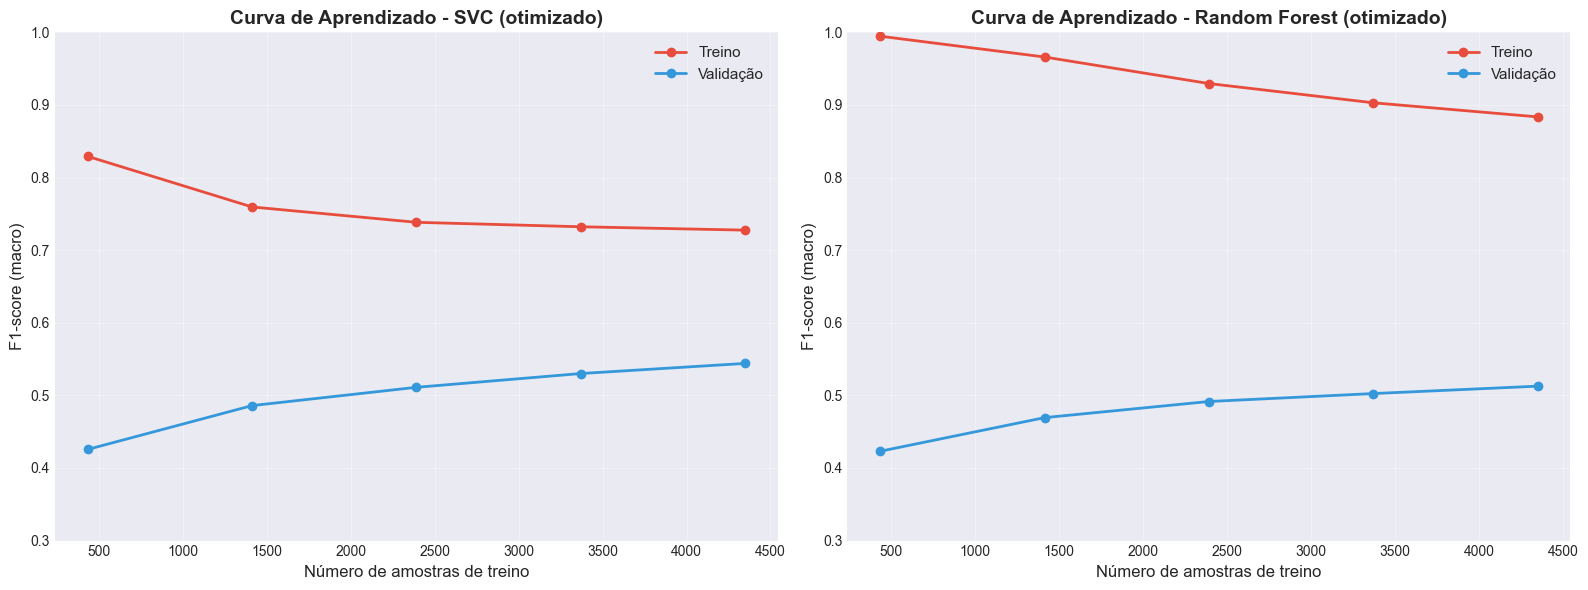

RESUMO COMPARATIVO - F1-SCORE (MACRO)

SVC (otimizado):
  - F1 médio em CV (GridSearch): 0.5563
  - Gap Treino-Validação:          0.1836

Random Forest (otimizado):
  - F1 médio em CV (GridSearch): 0.5133
  - Gap Treino-Validação:          0.3709



In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# =================================================
# CURVAS DE APRENDIZADO - SVC vs RANDOM FOREST
# =================================================

print("Gerando curvas de aprendizado...\n")

# Curva de aprendizado do SVC otimizado
print("[1/2] Calculando curva do SVC...")
train_sizes_svc, train_scores_svc, val_scores_svc = learning_curve(
    best_svc,
    X_train_processed,
    y_train,
    cv=3,
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean_svc = train_scores_svc.mean(axis=1)
val_mean_svc = val_scores_svc.mean(axis=1)

# Curva de aprendizado do Random Forest otimizado
print("[2/2] Calculando curva do Random Forest...")
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(
    best_rf,
    X_train_processed,
    y_train,
    cv=3,
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean_rf = train_scores_rf.mean(axis=1)
val_mean_rf = val_scores_rf.mean(axis=1)

print("\n✅ Curvas calculadas!\n")

# Plot lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# SVC
axes[0].plot(train_sizes_svc, train_mean_svc, 'o-', label='Treino', color='#e74c3c', linewidth=2)
axes[0].plot(train_sizes_svc, val_mean_svc, 'o-', label='Validação', color='#3498db', linewidth=2)
axes[0].set_xlabel('Número de amostras de treino', fontsize=12)
axes[0].set_ylabel('F1-score (macro)', fontsize=12)
axes[0].set_title('Curva de Aprendizado - SVC (otimizado)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=11)
axes[0].set_ylim([0.3, 1.0])

# Random Forest
axes[1].plot(train_sizes_rf, train_mean_rf, 'o-', label='Treino', color='#e74c3c', linewidth=2)
axes[1].plot(train_sizes_rf, val_mean_rf, 'o-', label='Validação', color='#3498db', linewidth=2)
axes[1].set_xlabel('Número de amostras de treino', fontsize=12)
axes[1].set_ylabel('F1-score (macro)', fontsize=12)
axes[1].set_title('Curva de Aprendizado - Random Forest (otimizado)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=11)
axes[1].set_ylim([0.3, 1.0])

plt.tight_layout()
plt.show()

# Resumo comparativo
print("="*70)
print("RESUMO COMPARATIVO - F1-SCORE (MACRO)")
print("="*70)
print(f"\nSVC (otimizado):")
print(f"  - F1 médio em CV (GridSearch): {grid_svc.best_score_:.4f}")
print(f"  - Gap Treino-Validação:          {(train_mean_svc[-1] - val_mean_svc[-1]):.4f}")
print(f"\nRandom Forest (otimizado):")
print(f"  - F1 médio em CV (GridSearch): {grid_rf.best_score_:.4f}")
print(f"  - Gap Treino-Validação:          {(train_mean_rf[-1] - val_mean_rf[-1]):.4f}")
print("\n" + "="*70)

### Visualização da Comparação

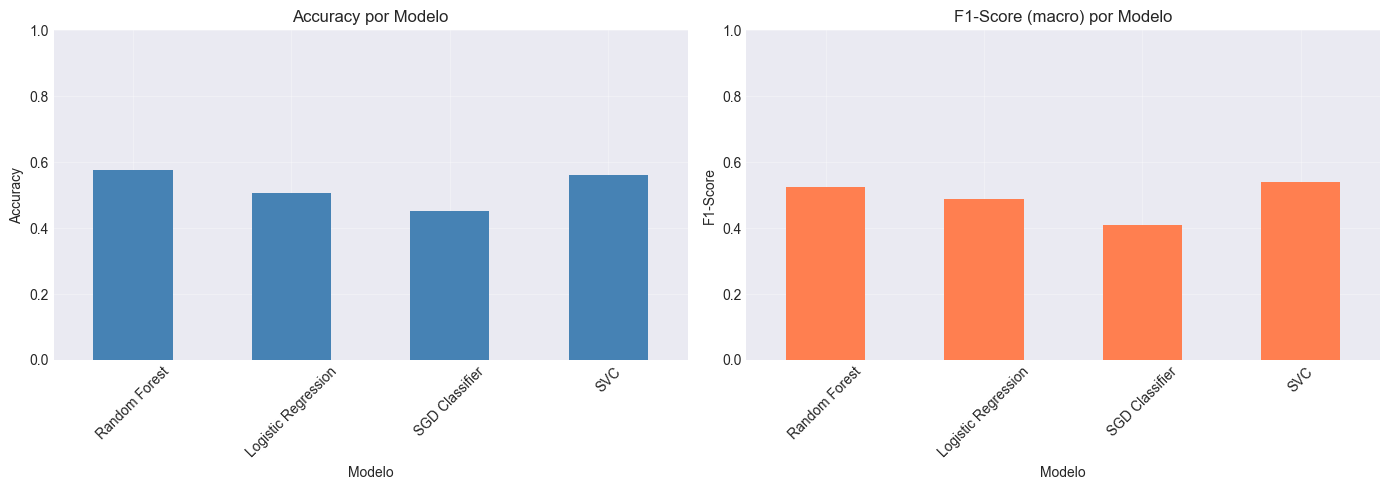

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
results_df.plot(x='Modelo', y='Accuracy', kind='bar', ax=axes[0], legend=False, color='steelblue')
axes[0].set_title('Accuracy por Modelo')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# F1-Score
results_df.plot(x='Modelo', y='F1-Score (macro)', kind='bar', ax=axes[1], legend=False, color='coral')
axes[1].set_title('F1-Score (macro) por Modelo')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Matriz de Confusão

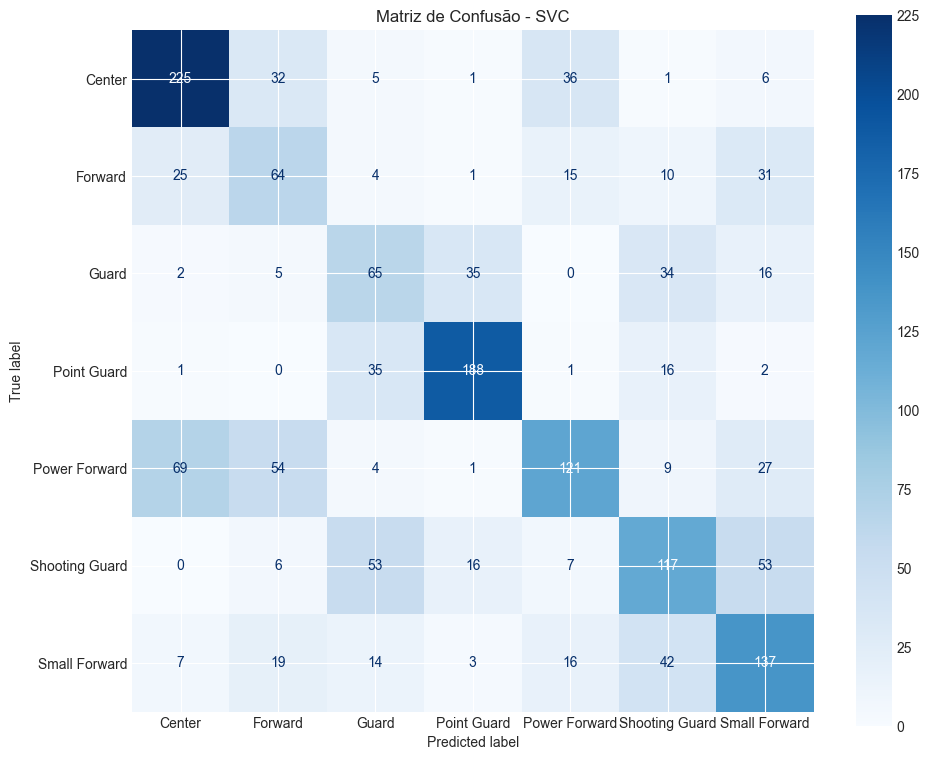

In [29]:
cm = confusion_matrix(y_test, predictions['SVC'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - SVC')
plt.tight_layout()
plt.show()

## 4.4 Curva de Validação - SVC

Análise da performance do modelo SVC em função dos hiperparâmetros.

Gerando curva de validação para o parâmetro C do SVC...



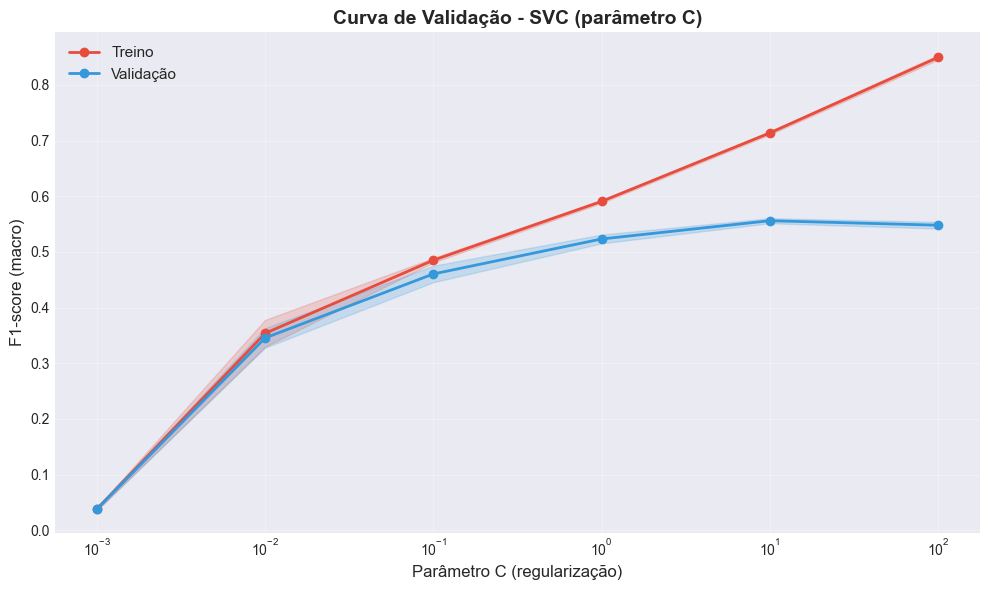


✅ Melhor valor de C: 10
   F1-score (validação): 0.5561 ± 0.0045
   F1-score (treino):    0.7137 ± 0.0029


In [ ]:
from sklearn.model_selection import validation_curve

# Curva de validação para o parâmetro C do SVC
print("Gerando curva de validação para o parâmetro C do SVC...\n")

param_range = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores, val_scores = validation_curve(
    SVC(kernel='rbf', gamma='scale', class_weight='balanced', random_state=42),
    X_train_processed,
    y_train,
    param_name='C',
    param_range=param_range,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot da curva de validação
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(param_range, train_mean, 'o-', label='Treino', color='#e74c3c', linewidth=2)
ax.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='#e74c3c')

ax.plot(param_range, val_mean, 'o-', label='Validação', color='#3498db', linewidth=2)
ax.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color='#3498db')

ax.set_xlabel('Parâmetro C (regularização)', fontsize=12)
ax.set_ylabel('F1-score (macro)', fontsize=12)
ax.set_title('Curva de Validação - SVC (parâmetro C)', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Melhor valor de C
best_c_idx = val_mean.argmax()
print(f"\n Melhor valor de C: {param_range[best_c_idx]}")
print(f"   F1-score (validação): {val_mean[best_c_idx]:.4f} ± {val_std[best_c_idx]:.4f}")
print(f"   F1-score (treino):    {train_mean[best_c_idx]:.4f} ± {train_std[best_c_idx]:.4f}")

## 4.5 Análise de Resíduos

Para classificação, analisamos os erros de predição através da matriz de confusão e análise de confiança das predições.

Treinando SVC com probabilidades habilitadas...



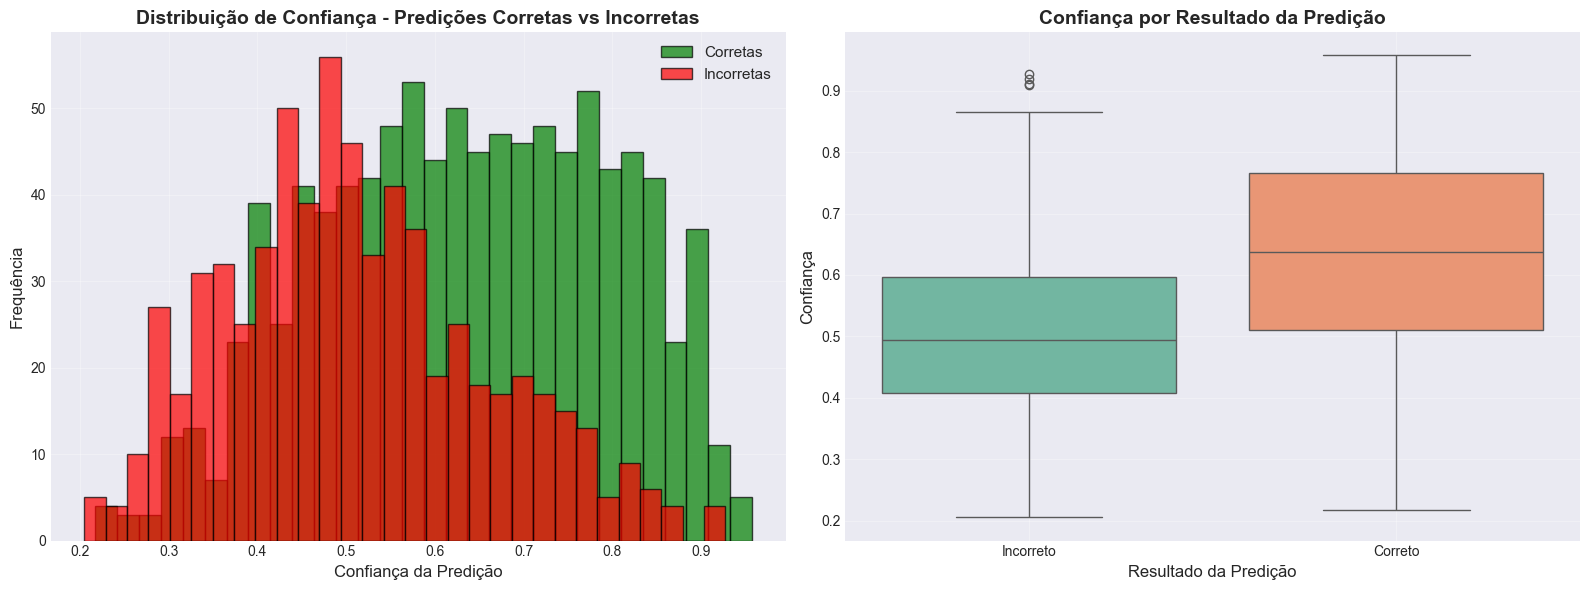

ANÁLISE DE RESÍDUOS - SVC

Confiança média (predições corretas):   0.6334 ± 0.1612
Confiança média (predições incorretas): 0.5098 ± 0.1453

Total de predições corretas:   974 (59.72%)
Total de predições incorretas: 657 (40.28%)

Predições com baixa confiança (<0.5): 570 (34.95%)

ERROS POR CLASSE

Center:
  Acurácia: 75.16%
  Confiança média: 0.6536
  Erros: 76/306

Forward:
  Acurácia: 45.33%
  Confiança média: 0.5156
  Erros: 82/150

Guard:
  Acurácia: 42.68%
  Confiança média: 0.5277
  Erros: 90/157

Point Guard:
  Acurácia: 76.54%
  Confiança média: 0.6941
  Erros: 57/243

Power Forward:
  Acurácia: 49.82%
  Confiança média: 0.5740
  Erros: 143/285

Shooting Guard:
  Acurácia: 54.37%
  Confiança média: 0.5439
  Erros: 115/252

Small Forward:
  Acurácia: 60.50%
  Confiança média: 0.5144
  Erros: 94/238


In [ ]:
# Obter probabilidades de predição (usando decision_function para SVC)
# Como SVC não tem predict_proba por padrão, vamos treinar um novo com probability=True
print("Treinando SVC com probabilidades habilitadas...\n")

svc_prob = SVC(
    kernel='rbf', 
    C=grid_svc.best_params_['C'],
    gamma=grid_svc.best_params_['gamma'],
    class_weight='balanced', 
    random_state=42,
    probability=True  # Habilita predict_proba
)

svc_prob.fit(X_train_processed, y_train)
y_pred_prob = svc_prob.predict_proba(X_test_processed)
y_pred_svc = svc_prob.predict(X_test_processed)

# Calcular confiança das predições
confidence = y_pred_prob.max(axis=1)

# Identificar predições corretas e incorretas
correct = (y_pred_svc == y_test)

# Análise de resíduos: confiança vs acerto
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de confiança
axes[0].hist(confidence[correct], bins=30, alpha=0.7, label='Corretas', color='green', edgecolor='black')
axes[0].hist(confidence[~correct], bins=30, alpha=0.7, label='Incorretas', color='red', edgecolor='black')
axes[0].set_xlabel('Confiança da Predição', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição de Confiança - Predições Corretas vs Incorretas', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Boxplot de confiança por resultado

confidence_df = pd.DataFrame({
    'Confiança': confidence,
    'Resultado': ['Correto' if c else 'Incorreto' for c in correct]
})

# --- ALTERAÇÃO AQUI ---
# Usando seaborn para facilitar as cores (palette)
# 'Set2' é uma paleta de cores, mas você pode usar uma lista como ['green', 'red']
sns.boxplot(data=confidence_df, x='Resultado', y='Confiança', ax=axes[1], palette='Set2')

axes[1].set_xlabel('Resultado da Predição', fontsize=12)
axes[1].set_ylabel('Confiança', fontsize=12)
axes[1].set_title('Confiança por Resultado da Predição', fontsize=14, fontweight='bold')
# axes[1].get_figure().suptitle('') # Não é necessário com seaborn, pois ele não adiciona o título padrão do pandas
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas de resíduos
print("="*70)
print("ANÁLISE DE RESÍDUOS - SVC")
print("="*70)
print(f"\nConfiança média (predições corretas):   {confidence[correct].mean():.4f} ± {confidence[correct].std():.4f}")
print(f"Confiança média (predições incorretas): {confidence[~correct].mean():.4f} ± {confidence[~correct].std():.4f}")
print(f"\nTotal de predições corretas:   {correct.sum()} ({100*correct.sum()/len(correct):.2f}%)")
print(f"Total de predições incorretas: {(~correct).sum()} ({100*(~correct).sum()/len(correct):.2f}%)")
print(f"\nPredições com baixa confiança (<0.5): {(confidence < 0.5).sum()} ({100*(confidence < 0.5).sum()/len(confidence):.2f}%)")
print("="*70)

# Análise de erros por classe
print("\n" + "="*70)
print("ERROS POR CLASSE")
print("="*70)
for pos in sorted(y_test.unique()):
    mask_pos = (y_test == pos)
    correct_pos = correct[mask_pos]
    conf_pos = confidence[mask_pos]
    
    print(f"\n{pos}:")
    print(f"  Acurácia: {100*correct_pos.sum()/len(correct_pos):.2f}%")
    print(f"  Confiança média: {conf_pos.mean():.4f}")
    print(f"  Erros: {(~correct_pos).sum()}/{len(correct_pos)}")

---
# Parte 5: Aplicação do Modelo SVC no Dataset Completo

Nesta seção, aplicamos o modelo SVC treinado e otimizado para prever as posições de todos os jogadores no dataset original.

In [ ]:
# Preparar o dataset completo para predição - JOGADORES ÚNICOS
print("="*70)
print("APLICANDO SVC NO DATASET COMPLETO - JOGADORES ÚNICOS")
print("="*70)

# Usar o dataset com features engineered (df_clean)
print(f"\nShape do dataset original: {df_clean.shape}")

# Agregar por jogador - usando a MÉDIA de todas as temporadas
print("\nAgregando dados por jogador (média de todas as temporadas)...")

# Colunas numéricas para agregar
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Criar agregação
agg_dict = {col: 'mean' for col in numeric_cols}

# Para colunas categóricas, usar moda (valor mais frequente)
if 'exp_bin' in df_clean.columns:
    agg_dict['exp_bin'] = lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]

# Manter a posição mais frequente
agg_dict['position'] = lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]

# Manter o último time e ano
agg_dict['team'] = 'last'
agg_dict['year'] = 'last'

# Agrupar por jogador
df_unique = df_clean.groupby('name', as_index=False).agg(agg_dict)

print(f"Shape após agregação: {df_unique.shape}")
print(f"Jogadores únicos: {df_unique['name'].nunique()}")

# Verificar se exp_bin existe
if 'exp_bin' in df_unique.columns:
    print(f" Coluna 'exp_bin' preservada: {df_unique['exp_bin'].nunique()} categorias")
else:
    print(" Coluna 'exp_bin' não encontrada")

# Separar features e target
X_full = df_unique.drop(['position', 'name', 'team', 'year'], axis=1)
y_full = df_unique['position']

print(f"\nNúmero de features: {X_full.shape[1]}")
print(f"Features: {X_full.columns.tolist()}")

# Aplicar o mesmo pré-processamento
print("\nAplicando pré-processamento...")
X_full_processed = preprocess.transform(X_full)

# Fazer predições com o melhor modelo SVC
print("Gerando predições...")
y_pred_full = best_svc.predict(X_full_processed)

# Obter probabilidades
svc_full_prob = SVC(
    kernel='rbf', 
    C=grid_svc.best_params_['C'],
    gamma=grid_svc.best_params_['gamma'],
    class_weight='balanced', 
    random_state=42,
    probability=True
)
svc_full_prob.fit(X_train_processed, y_train)
y_pred_full_prob = svc_full_prob.predict_proba(X_full_processed)
confidence_full = y_pred_full_prob.max(axis=1)

# Criar dataframe com resultados
df_predictions = df_unique.copy()
df_predictions['posicao_predita'] = y_pred_full
df_predictions['confianca'] = confidence_full
df_predictions['predicao_correta'] = (df_predictions['position'] == df_predictions['posicao_predita'])

print("\n Predições concluídas!")
print(f"\n Total de jogadores únicos: {len(df_predictions)}")
print(f"Acurácia geral: {100*df_predictions['predicao_correta'].mean():.2f}%")
print(f"Confiança média: {df_predictions['confianca'].mean():.4f}")

# Salvar resultados
output_file = 'nba_predictions_svc_unique_players.csv'
df_predictions.to_csv(output_file, index=False)
print(f"\nResultados salvos em: {output_file}")

# Mostrar exemplos
print("\n" + "="*70)
print("EXEMPLOS DE PREDIÇÕES - JOGADORES ÚNICOS")
print("="*70)
print("\nPrimeiras 10 predições:")
display(df_predictions[['name', 'position', 'posicao_predita', 'confianca', 'predicao_correta']].head(10))

print("\nPredições com maior confiança:")
display(df_predictions.nlargest(5, 'confianca')[['name', 'position', 'posicao_predita', 'confianca', 'predicao_correta']])

print("\nPredições com menor confiança:")
display(df_predictions.nsmallest(5, 'confianca')[['name', 'position', 'posicao_predita', 'confianca', 'predicao_correta']])

print("\nPredições incorretas (se houver):")
erros = df_predictions[df_predictions['predicao_correta'] == False].head(10)
if len(erros) > 0:
    display(erros[['name', 'position', 'posicao_predita', 'confianca']])
else:
    print("Nenhum erro encontrado!")

APLICANDO SVC NO DATASET COMPLETO - JOGADORES ÚNICOS

Shape do dataset original: (8155, 37)

Agregando dados por jogador (média de todas as temporadas)...
Shape após agregação: (1644, 37)
Jogadores únicos: 1644
✅ Coluna 'exp_bin' preservada: 4 categorias

Número de features: 33
Features: ['avgPoints', 'avgRebounds', 'avgAssists', 'avgBlocks', 'avgSteals', 'avgMinutes', 'avgTurnovers', 'fieldGoalPct', 'threePointFieldGoalPct', 'freeThrowPct', 'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted', 'experience_num', 'assist_turnover_ratio', 'assists_per_minute', 'playmaking_score', 'rebounds_per_minute', 'blocks_per_minute', 'interior_dominance', 'three_point_rate', 'scoring_efficiency', 'perimeter_threat', 'defensive_versatility', 'defensive_impact', 'steals_per_minute', 'points_per_minute', 'usage_rate', 'true_shooting_pct', 'exp_bin']

Aplicando pré-processamento...
Gerando prediçõ

,name,position,posicao_predita,confianca,predicao_correta
0,AJ Griffin,Forward,Shooting Guard,0.654123,False
1,AJ Hammons,Center,Forward,0.402530,False
2,Aaron Brooks,Guard,Guard,0.485574,True
3,Aaron Gordon,Power Forward,Power Forward,0.863850,True
4,Aaron Gray,Center,Center,0.613240,True
5,Aaron Harrison,Guard,Forward,0.267943,False
6,Aaron Holiday,Guard,Point Guard,0.537960,False
7,Aaron McKie,Shooting Guard,Guard,0.347945,False
8,Aaron Nesmith,Small Forward,Forward,0.426829,False
9,Aaron Wiggins,Shooting Guard,Forward,0.379168,False



Predições com maior confiança:


,name,position,posicao_predita,confianca,predicao_correta
1567,Tyus Jones,Point Guard,Point Guard,0.949117,True
1126,Mike Conley,Point Guard,Point Guard,0.948128,True
632,Ivica Zubac,Center,Center,0.944802,True
1092,Matthew Dellavedova,Point Guard,Point Guard,0.943216,True
1436,Speedy Claxton,Point Guard,Point Guard,0.942017,True



Predições com menor confiança:


,name,position,posicao_predita,confianca,predicao_correta
683,James Augustine,Power Forward,Center,0.212098,False
1530,Trevelin Queen,Shooting Guard,Shooting Guard,0.221917,True
845,Josh Giddey,Shooting Guard,Guard,0.222619,False
1396,Sekou Doumbouya,Small Forward,Small Forward,0.226882,True
877,Justin Patton,Center,Center,0.227587,True



Predições incorretas (se houver):


,name,position,posicao_predita,confianca
0,AJ Griffin,Forward,Shooting Guard,0.654123
1,AJ Hammons,Center,Forward,0.402530
5,Aaron Harrison,Guard,Forward,0.267943
6,Aaron Holiday,Guard,Point Guard,0.537960
7,Aaron McKie,Shooting Guard,Guard,0.347945
8,Aaron Nesmith,Small Forward,Forward,0.426829
9,Aaron Wiggins,Shooting Guard,Forward,0.379168
13,Adam Morrison,Small Forward,Shooting Guard,0.493290
14,Admiral Schofield,Small Forward,Forward,0.372544
16,Adreian Payne,Power Forward,Forward,0.484311


## 5.1 Visualizações das Predições

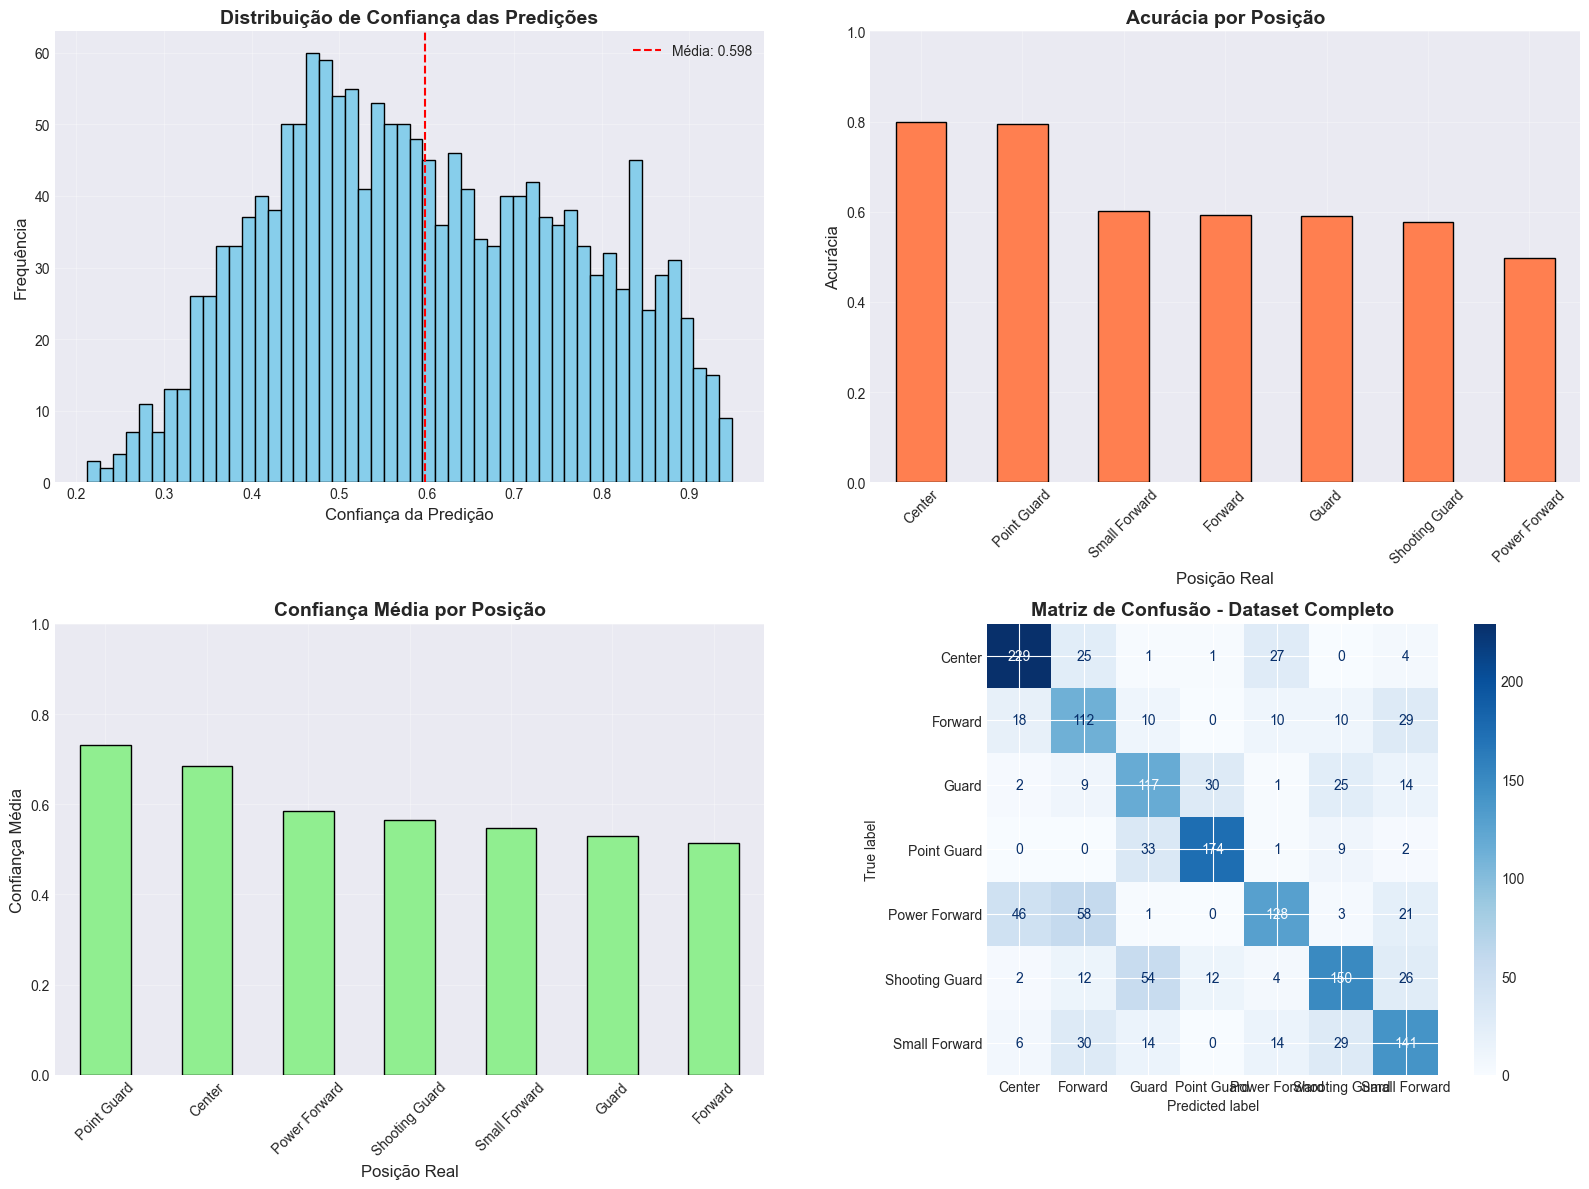


ESTATÍSTICAS POR POSIÇÃO


,Acertos,Total,Acurácia,Confiança Média,Confiança Std
position,,,,,
Center,229,287,0.7979,0.6837,0.1641
Forward,112,189,0.5926,0.5139,0.1273
Guard,117,198,0.5909,0.5294,0.1377
Point Guard,174,219,0.7945,0.7317,0.1713
Power Forward,128,257,0.4981,0.5855,0.1563
Shooting Guard,150,260,0.5769,0.5643,0.1510
Small Forward,141,234,0.6026,0.5477,0.1360


In [33]:
# Visualizações das predições
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribuição de confiança
axes[0, 0].hist(df_predictions['confianca'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Confiança da Predição', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].set_title('Distribuição de Confiança das Predições', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df_predictions['confianca'].mean(), color='red', linestyle='--', 
                    label=f'Média: {df_predictions["confianca"].mean():.3f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Acurácia por posição
accuracy_by_pos = df_predictions.groupby('position')['predicao_correta'].mean().sort_values(ascending=False)
accuracy_by_pos.plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Posição Real', fontsize=12)
axes[0, 1].set_ylabel('Acurácia', fontsize=12)
axes[0, 1].set_title('Acurácia por Posição', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Confiança por posição
confidence_by_pos = df_predictions.groupby('position')['confianca'].mean().sort_values(ascending=False)
confidence_by_pos.plot(kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Posição Real', fontsize=12)
axes[1, 0].set_ylabel('Confiança Média', fontsize=12)
axes[1, 0].set_title('Confiança Média por Posição', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Matriz de confusão do dataset completo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_full = confusion_matrix(df_predictions['position'], df_predictions['posicao_predita'])
disp_full = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=sorted(y_full.unique()))
disp_full.plot(ax=axes[1, 1], cmap='Blues', values_format='d')
axes[1, 1].set_title('Matriz de Confusão - Dataset Completo', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estatísticas por posição
print("\n" + "="*70)
print("ESTATÍSTICAS POR POSIÇÃO")
print("="*70)
stats_by_pos = df_predictions.groupby('position').agg({
    'predicao_correta': ['sum', 'count', 'mean'],
    'confianca': ['mean', 'std']
}).round(4)

stats_by_pos.columns = ['Acertos', 'Total', 'Acurácia', 'Confiança Média', 'Confiança Std']
display(stats_by_pos)